In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from IPython.display import Code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

/Users/gracedonovan/opt/anaconda3/envs/msds600/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set()

In [3]:
hr_df = pd.read_csv('../week_6/HR-Employee-Attrition.csv', index_col='EmployeeNumber')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr_df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [5]:
#convert categorical data values to numerical (businesstravel)
hr_df['business_travel']=hr_df['BusinessTravel'].replace({'Travel_Rarely':1,"Travel_Frequently":2,'Non-Travel':0})

In [6]:
#convert categorical data values to numerical (department)
hr_df['department']=hr_df['Department'].replace({"Research & Development":0,"Sales":1,"Human Resources":2})

In [7]:
#convert categorical data values to numerical (attrition)
hr_df['attrition']=hr_df['Attrition'].replace({"No":0,"Yes":1})

In [8]:
#remove categorical data columns
up_hr_df=hr_df.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','Age','DailyRate','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','Education','EmployeeCount'], axis=1)

In [9]:
#check to see if there are any columns with null values and that they only contain int data types
up_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   DistanceFromHome         1470 non-null   int64
 1   JobLevel                 1470 non-null   int64
 2   JobSatisfaction          1470 non-null   int64
 3   MonthlyIncome            1470 non-null   int64
 4   YearsAtCompany           1470 non-null   int64
 5   YearsInCurrentRole       1470 non-null   int64
 6   YearsSinceLastPromotion  1470 non-null   int64
 7   YearsWithCurrManager     1470 non-null   int64
 8   business_travel          1470 non-null   int64
 9   department               1470 non-null   int64
 10  attrition                1470 non-null   int64
dtypes: int64(11)
memory usage: 137.8 KB


In [10]:
#print attrition data values
up_hr_df['attrition'].value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [11]:
#break data into features and targets
features = up_hr_df.drop('attrition', axis=1)
targets = up_hr_df['attrition']

In [12]:
#split data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [13]:
#run TPOTClassifier - test accuracy
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=-1, random_state=42)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))

                                                                                
Generation 1 - Current best internal CV score: 0.8557383792677911
                                                                                
Generation 2 - Current best internal CV score: 0.8557383792677911
                                                                                
Generation 3 - Current best internal CV score: 0.8557383792677911
                                                                                
Generation 4 - Current best internal CV score: 0.8557383792677911
                                                                                
Generation 5 - Current best internal CV score: 0.858440970793912
                                                                                
Best pipeline: RandomForestClassifier(Normalizer(input_matrix, norm=max), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.

/Users/gracedonovan/opt/anaconda3/envs/msds600/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [16]:
lr_model=LogisticRegression(max_iter=4000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=4000)

In [17]:
#provide accuracy score
print(lr_model.score(x_train, y_train)) 
print(lr_model.score(x_test, y_test)) 

0.8457350272232305
0.8505434782608695


/Users/gracedonovan/opt/anaconda3/envs/msds600/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


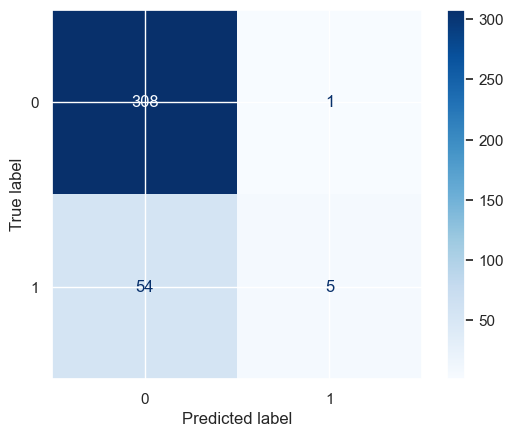

In [18]:
#plot confusion matrix
plot_confusion_matrix(lr_model, x_test, y_test, cmap='Blues')

In [19]:
#examine coefficients
lr_model.coef_

array([[ 2.54242391e-02, -7.10286057e-02, -3.98137597e-01,
        -1.16248194e-04,  5.12232879e-03, -1.39514592e-01,
         1.61461533e-01, -1.38040157e-01,  4.72383550e-01,
         4.38578946e-01]])

In [20]:
#create coefficient dataframe
lr_coef_df = pd.DataFrame(data=lr_model.coef_, columns=features.columns)

<AxesSubplot: >

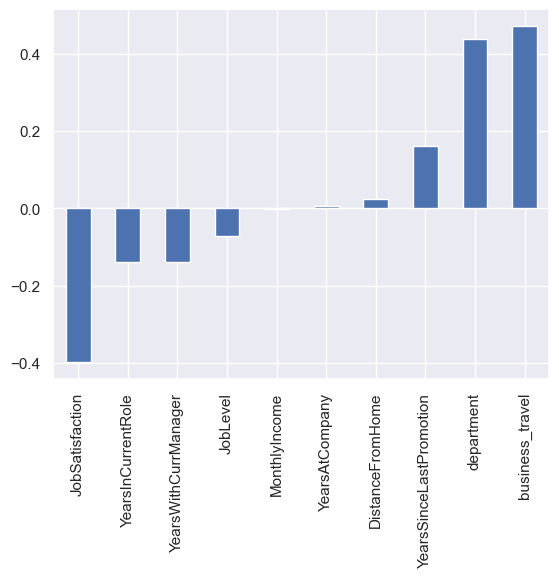

In [21]:
#graph coefficient data - numbers describe the impact of a given variable (column)
lr_coef_df.T.sort_values(by=0).plot.bar(legend=False)

In [22]:
lr_coef_df

,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,business_travel,department
0,0.025424,-0.071029,-0.398138,-0.000116,0.005122,-0.139515,0.161462,-0.13804,0.472384,0.438579


<AxesSubplot: >

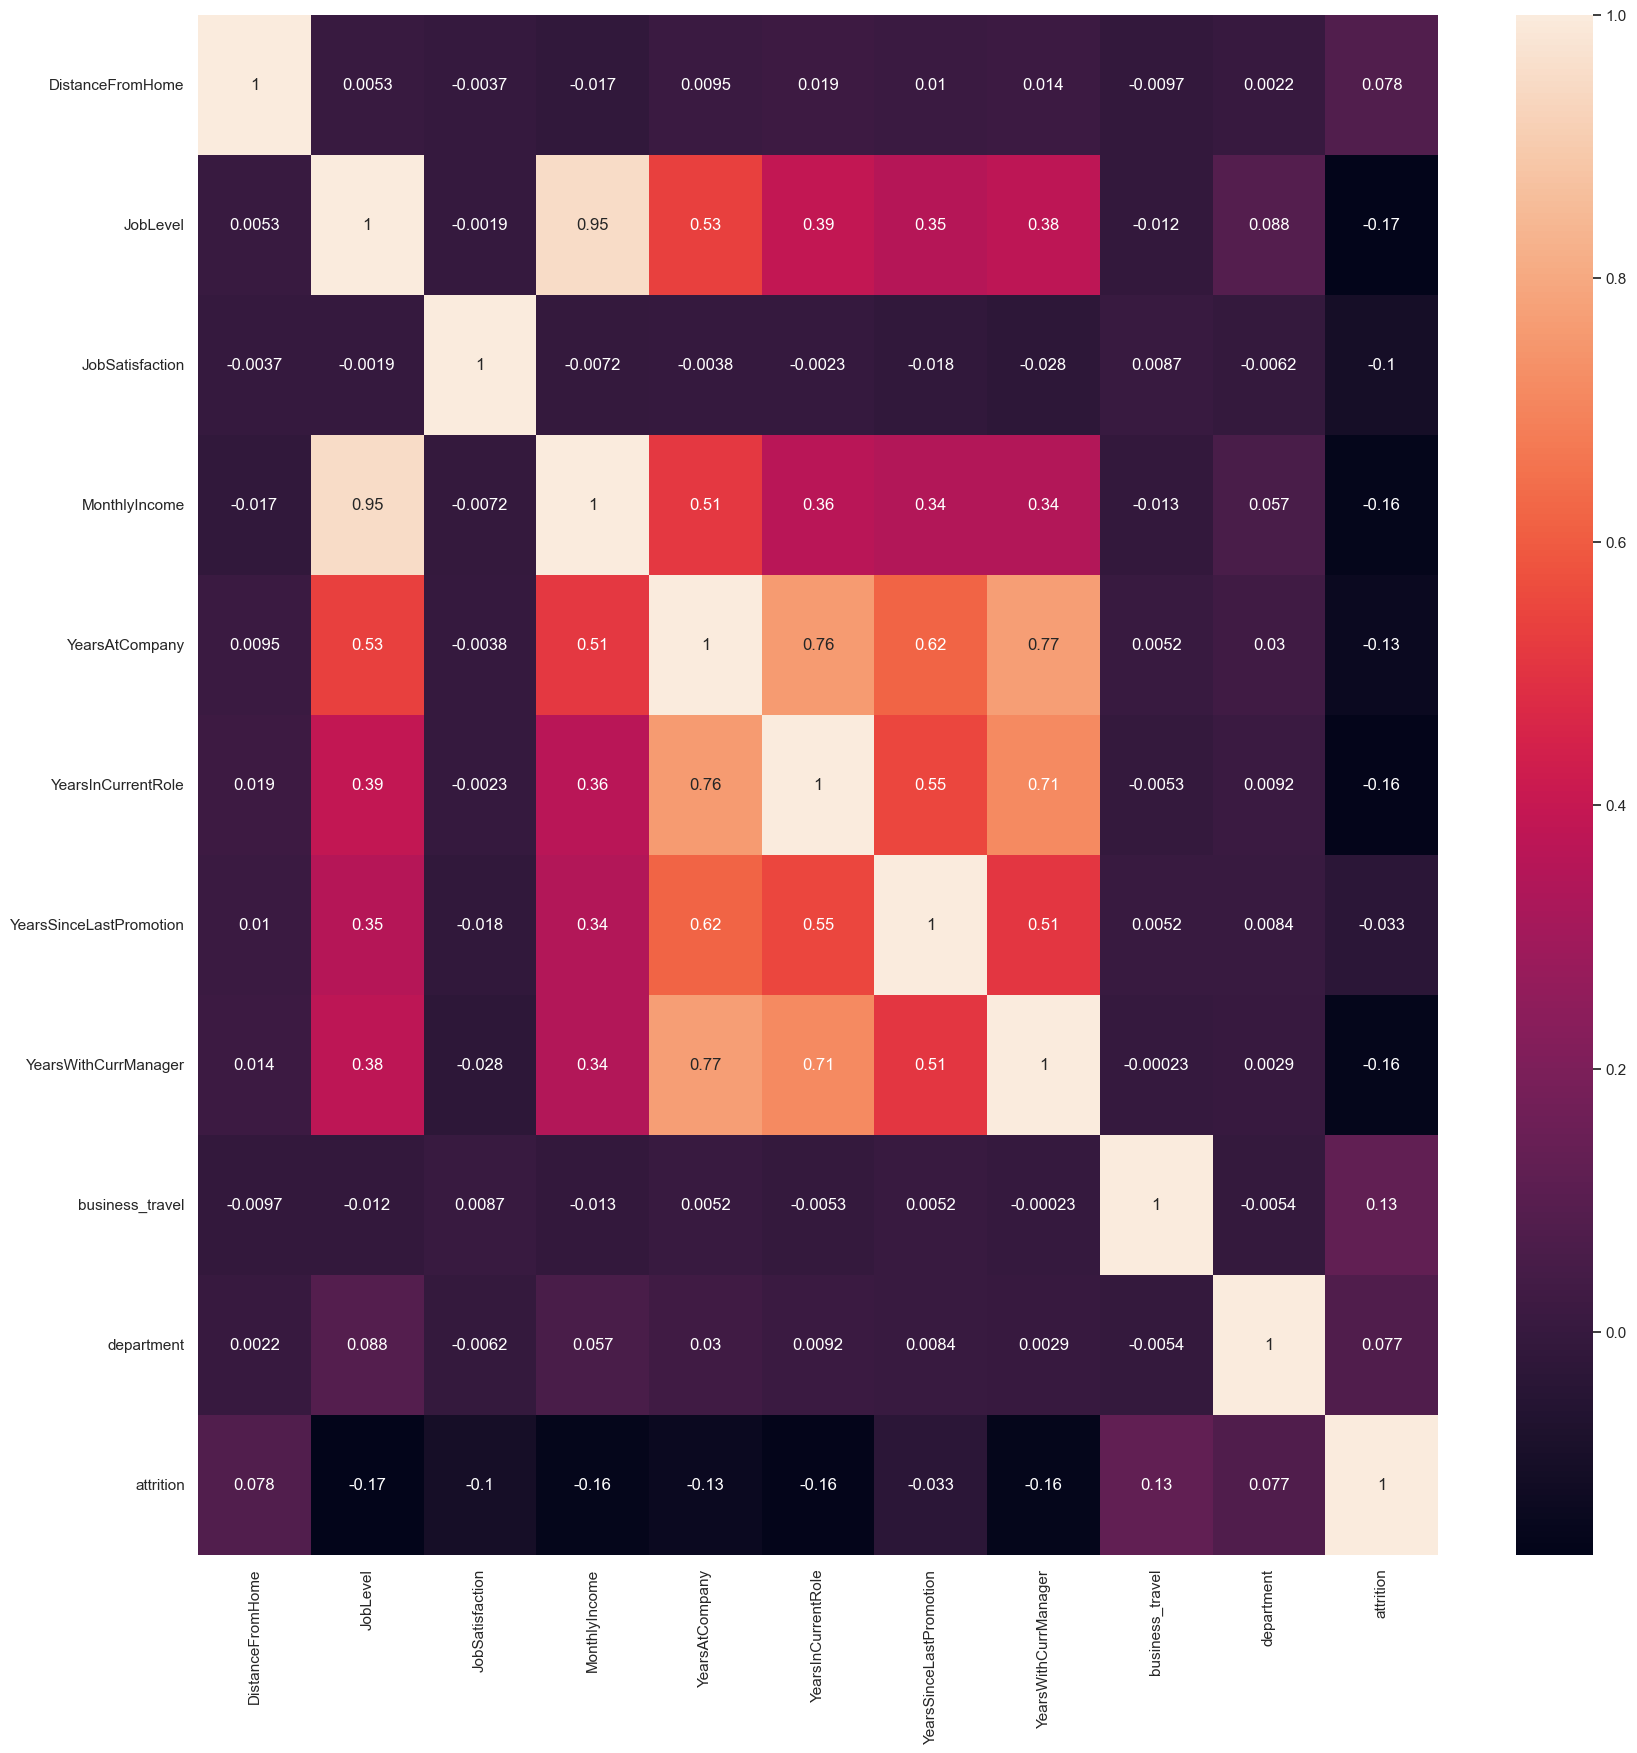

In [23]:
#plot the correlations in a correlogram
f = plt.figure(figsize=(20, 20))
sns.heatmap(up_hr_df.corr(), annot=True)